## Business Problem
Your company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but lack domain knowledge about potential aircraft risks. You are tasked with identifying which aircraft types pose the lowest risk based on historical incident data. These insights will guide the head of the new aviation division in making informed decisions about which aircraft to purchase.

## Importing Libraries
### Overview of Libraries
- `pandas` for data manipulation
- `matplotlib` and `seaborn` for data visualization
These libraries will help in exploring, cleaning, and visualizing the dataset effectively.

In [1]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and familiarizing with the Dataset
Read the dataset into a pandas DataFrame.

In [2]:
# Load the dataset and set specific columns (6, 7, 28) to string data type
df = pd.read_csv('Data/Aviation_Data.csv', dtype={i: str for i in [6, 7, 28]})

In [3]:
# Display the first 5 rows of the DataFrame
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Display the last 5 rows of the DataFrame
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Initial Data Exploration Findings

After loading the dataset, initial exploration reveals several key characteristics:

* **Dataset Size:** The dataset is quite large, containing **90,348 rows** and **31 columns**. This provides a substantial amount of data for analysis.

* **Time Frame:** The data spans a very long period. The first entry is from **1948** (`df.head()`), and the last is from **2022** (`df.tail()`). For the business problem, the older data may not be relevant to the safety of modern aircraft.

* **Missing Values:** The `.info()` output shows that several columns have a significant amount of missing data. For example, `Aircraft.Category`, `Schedule`, and `FAR.Description` are missing over half of their values. This will be a major focus when data cleaning.

* **Data Types:** The `Event.Date` column is currently an `object` (text) and will need to be converted to a `datetime` format to allow for time-based filtering and analysis. The injury columns are `float64` and should be converted to integers.

## Data Cleaning and Preparation

Initial exploration showed that the raw data has many columns not needed, duplicates and a lot of missing values. In this section, the data will be cleaned step-by-step to create a reliable dataset for analysis.

### Selecting Relevant Columns and Removing Duplicates

First, I will create a new DataFrame called `df_clean` that contains only the columns relevant to the business problem. I will then remove any rows that are complete duplicates.

In [6]:
# Define the list of columns that are useful for the analysis
relevant_cols = [
    'Event.Date', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
    'Number.of.Engines', 'Engine.Type', 'Amateur.Built', 'Weather.Condition',
    'Location', 'Broad.phase.of.flight', 'Purpose.of.flight',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured'
]

# Create a new DataFrame with only these columns.
# Using .copy() helps avoid inplace parameter errors
df_clean = df[relevant_cols].copy()

# Remove any duplicate rows
df_clean.drop_duplicates(inplace=True)

# Show the new Dataframe's shape
print(f"Shape of the DataFrame is now: {df_clean.shape}")

Shape of the DataFrame is now: (88855, 16)


### Filtering by Aircraft Category

The business is focused on purchasing and operating **airplanes**. I need to filter the dataset to exclude other categories like helicopters, gliders, balloons, etc.

In [7]:
# Show the different types of aircraft in the data
print("Original Aircraft Categories:")
print(df_clean['Aircraft.Category'].value_counts(dropna = False))

# Standardize column to lowercase
df_clean['Aircraft.Category'] = df_clean['Aircraft.Category'].str.lower()

# Only rows with airplane in the category are retained in the DataFrame
df_clean = df_clean[df_clean['Aircraft.Category'] == 'airplane'].copy()

print(f"\nAfter filtering for airplanes, the shape is: {df_clean.shape}")

Original Aircraft Categories:
NaN                  56578
Airplane             27609
Helicopter            3438
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

After filtering for airplanes, the shape is: (27609, 16)


### Handling Missing Values and "Unknowns"

The dataset now contains only airplanes, but still has many missing values. I will clean the most important categorical columns. My general strategy will be:

1.  **Examine:** Look at the value counts to see what's in the column.
2.  **Standardize:** Combine similar categories (e.g., 'UNK' and 'Unk' into 'Unknown').
3.  **Decide:** For each column, I will decide whether to drop the rows with missing/unknown data. For this analysis, I want a high-quality dataset, so I will remove rows where the **Engine Type**, **Weather**, or **Damage** are missing or unknown.

In [8]:
#Show percentage of Null values in column
print(f"Broad.phase.of.flight column has {df_clean['Broad.phase.of.flight'].isna().mean() * 100} missing values")

# Drop Broad.phase.of.flight because it has too many missing values
df_clean.drop(columns='Broad.phase.of.flight', inplace=True)

Broad.phase.of.flight column has 76.79379912347423 missing values


#### Cleaning `Engine.Type`
An aircraft's engine is critical information. I will remove rows where this is missing or unknown.

In [9]:
# Standardize 'UNK' to 'Unknown' and strip any extra whitespace
df_clean['Engine.Type'] = df_clean['Engine.Type'].str.strip().replace({'UNK': 'Unknown'})

# Fill NaN values with 'Unknown'
df_clean['Engine.Type'] = df_clean['Engine.Type'].fillna('Unknown')

# Now, remove all rows where Engine.Type is 'Unknown'
df_clean = df_clean[df_clean['Engine.Type'] != 'Unknown'].copy()

print(f"After cleaning Engine.Type, shape is: {df_clean.shape}")

After cleaning Engine.Type, shape is: (23233, 15)


#### Cleaning `Weather.Condition`
Weather is a key factor in accidents. I will remove incidents where the weather was not recorded.

In [10]:
# Standardize 'Unk' and 'UNK'
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].replace({'Unk': 'UNK'})

# Fill NaN values with 'UNK'
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].fillna('UNK')

# Remove rows with 'UNK' weather
df_clean = df_clean[df_clean['Weather.Condition'] != 'UNK'].copy()
print(f"After cleaning Weather.Condition, shape is: {df_clean.shape}")

After cleaning Weather.Condition, shape is: (22325, 15)


#### Cleaning `Number.of.Engines`
I decided to fill missing engine counts with the mode as most aircraft are single-engine.

In [11]:
# Fill missing Number.of.Engines with the mode (which is 1.0)
mode_engines = df_clean['Number.of.Engines'].mode()[0]
df_clean['Number.of.Engines'] = df_clean['Number.of.Engines'].fillna(mode_engines)

# Convert the column to integer type
df_clean['Number.of.Engines'] = df_clean['Number.of.Engines'].astype(int)

#### Cleaning `Aircraft.damage`
Similar to previous steps, I will remove rows where the damage level is 'Unknown'.

In [12]:
# Standardize and fill NaN values
df_clean['Aircraft.damage'] = df_clean['Aircraft.damage'].fillna('Unknown').str.title()

# Remove rows with 'Unknown' damage
df_clean = df_clean[df_clean['Aircraft.damage'] != 'Unknown'].copy()
print(f"After cleaning Aircraft.damage, shape is: {df_clean.shape}")

After cleaning Aircraft.damage, shape is: (21948, 15)


#### Cleaning `Amateur.Built`, `Location`, `Make`, and `Model`
These are the final columns to clean. `Make` and `Model` are the most important, so I decided to drop any rows where they are missing.

In [13]:
# Show value counts in column
df_clean['Amateur.Built'].value_counts()

No     19067
Yes     2878
Name: Amateur.Built, dtype: int64

In [14]:
# Fill missing 'Amateur.Built' values with 'No' (the most common value)
df_clean['Amateur.Built'] = df_clean['Amateur.Built'].fillna('No')

# Drop the few rows with missing Make, Model, or Location
df_clean.dropna(subset=['Make', 'Model', 'Location'], inplace=True)

print(f"Shape of the DataFrame is now: {df_clean.shape}")

Shape of the DataFrame is now: (21928, 15)


### Cleaning Numerical Columns

In this section, I clean the numerical data. The injury columns (`Total.Fatal.Injuries`, etc.) are floats and contain missing values. I will convert these to integers, filling any missing values with 0.

In [15]:
# Define the list of injury-related columns
injury_cols = [
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured'
]

# Loop through each column to fill missing values with 0 and convert to integer type
for col in injury_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0).astype(int)

df_clean[injury_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21928 entries, 5 to 90226
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Total.Fatal.Injuries    21928 non-null  int64
 1   Total.Serious.Injuries  21928 non-null  int64
 2   Total.Minor.Injuries    21928 non-null  int64
 3   Total.Uninjured         21928 non-null  int64
dtypes: int64(4)
memory usage: 856.6 KB


## Feature Engineering

To make this analysis more powerful, I will create a new feature called `Risk_Score`. This score will represent the overall severity of an incident based on the injuries. I will assign a weight to each injury type allowing a comparison between the severity of different incidents:

* **Fatal Injury:** 3 points
* **Serious Injury:** 2 points
* **Minor Injury:** 1 point

In [16]:
# Creating the 'Risk_Score' column using a weighted sum of injuries
df_clean['Risk_Score'] = (
    df_clean['Total.Fatal.Injuries'] * 3 +
    df_clean['Total.Serious.Injuries'] * 2 +
    df_clean['Total.Minor.Injuries'] * 1
)

# Show Injury Severity columns
df_clean[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Risk_Score']].head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Risk_Score
5,0,0,1,1
7,0,0,0,0
8,0,0,0,0
12,0,0,1,1
13,1,0,0,3


## Final Data Preparation

Before analysis and visualization:

1.  **Filter by Date:** Focus the analysis on the modern aviation era. The dataset will be filtered to include incidents from **2000 to the present**.
2.  **Standardize Text:** Clean up the `Make` and `Model` columns.
3.  **Combine Columns:** Create a `Make_Model` column to uniquely identify each airplane model.

In [17]:
# Convert 'Event.Date' to datetime objects
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')

# Filter for incidents in the 21st century for maximum relevance
df_clean = df_clean[df_clean['Event.Date'].dt.year >= 2000].copy()

# Standardize text columns by stripping whitespace and converting to uppercase
cols_to_clean = ['Make', 'Model']
for col in cols_to_clean:
    df_clean[col] = df_clean[col].str.strip().str.upper()

# Create the 'Make_Model' column
df_clean['Make_Model'] = df_clean['Make'] + ' ' + df_clean['Model']

print(f"The final shape of the cleaned dataset is: {df_clean.shape}")

The final shape of the cleaned dataset is: (18719, 17)


In [18]:
# Save the final cleaned DataFrame to a CSV file.
df_clean.to_csv('data/cleaned_aviation_data.csv', index=False)

## Data Visualization

Now that cleaning and preparing of the dataset is done, I will create visualizations to answer the business question: **Which airplanes are the lowest risk?**

To ensure my recommendations are based on reliable data, I will filter the analysis to only include airplane models that have had a significant number of incidents (50 or more) since 2000. This focuses attention to common, well-documented airplanes.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the incident count for each unique aircraft model
model_counts = df_clean['Make_Model'].value_counts()

# Only analyzing models that appear 50 or more times in the cleaned dataset
common_models = model_counts[model_counts >= 50].index

# Filter the main DataFrame to only include these common models
df_viz = df_clean[df_clean['Make_Model'].isin(common_models)].copy()

print(f"Original number of unique models: {len(model_counts)}")
print(f"Number of common models (>= 50 incidents) to be analyzed: {len(common_models)}")

Original number of unique models: 5757
Number of common models (>= 50 incidents) to be analyzed: 42


### Which Aircraft Are the Safest?

This chart answers the main question. I will calculate the average `Risk_Score` for each common airplane model. A lower score indicates a better historical safety record. The chart below shows the top 15 models with the lowest average risk scores.

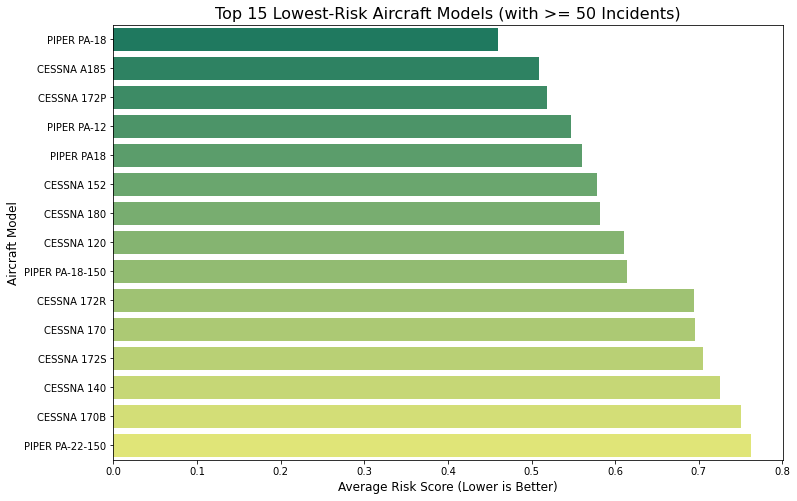

In [20]:
# Group by Make_Model and calculate the mean Risk_Score
model_risk = df_viz.groupby('Make_Model')['Risk_Score'].mean().sort_values(ascending=True)

# Select the top 15 safest models
top_15_safest = model_risk.head(15)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_safest.values, y=top_15_safest.index, palette='summer')

plt.title('Top 15 Lowest-Risk Aircraft Models (with >= 50 Incidents)', fontsize=16)
plt.xlabel('Average Risk Score (Lower is Better)', fontsize=12)
plt.ylabel('Aircraft Model', fontsize=12)
plt.show()

### Which Airplanes Are the Riskiest?

It is crucial to identify which airplane have a history of more severe incidents. This chart shows the 15 models with the highest average `Risk_Score`. This information will help the company avoid potentially problematic investments.

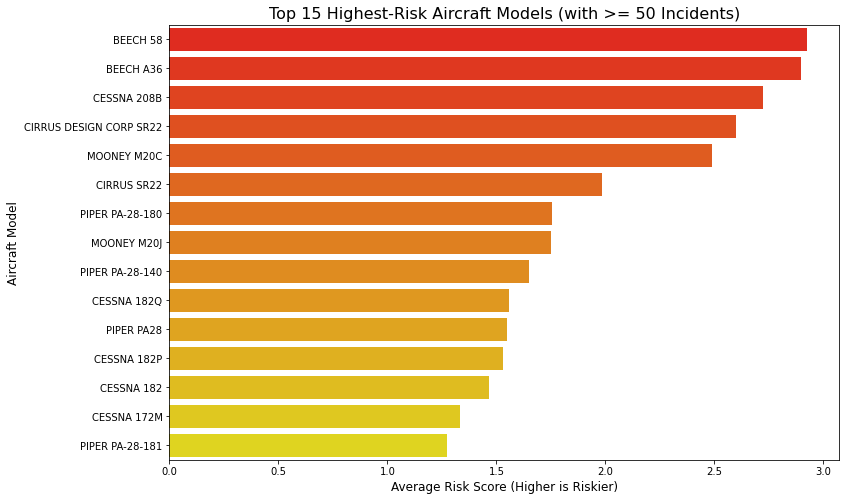

In [21]:
# Select the top 15 riskiest models (use .tail(15) from the sorted list)
top_15_riskiest = model_risk.tail(15).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_riskiest.values, y=top_15_riskiest.index, palette='autumn')

plt.title('Top 15 Highest-Risk Aircraft Models (with >= 50 Incidents)', fontsize=16)
plt.xlabel('Average Risk Score (Higher is Riskier)', fontsize=12)
plt.ylabel('Aircraft Model', fontsize=12)
plt.show()

### How Does Engine Type Affect Incident Severity?

While reciprocating engines are in the most common airplane, are they involved in more or less severe incidents? This chart compares the average `Risk_Score` for each engine type. This will help inform what kind of engine technology the company should invest in.

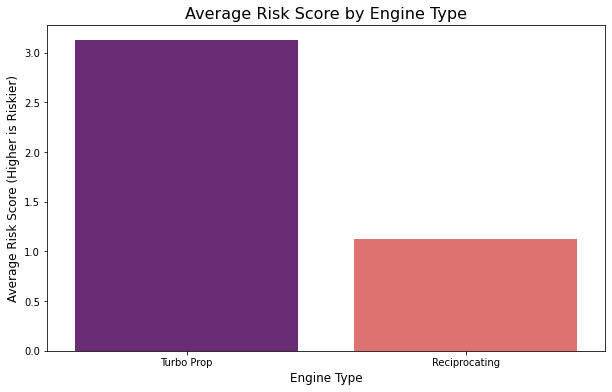

In [22]:
# Group by Engine.Type and calculate the mean Risk_Score
risk_by_engine = df_viz.groupby('Engine.Type')['Risk_Score'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=risk_by_engine.index, y=risk_by_engine.values, palette='magma')

plt.title('Average Risk Score by Engine Type', fontsize=16)
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Average Risk Score (Higher is Riskier)', fontsize=12)
plt.show()

### What is the Impact of Weather on Incident Severity?

This is perhaps one of the most important operational questions. Are accidents in bad weather (IMC - Instrument Meteorological Conditions) more severe than those in good weather (VMC - Visual Meteorological Conditions)?

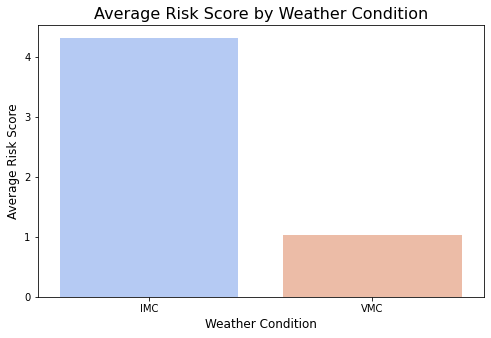

In [23]:
# Group by Weather.Condition and calculate the mean Risk_Score
risk_by_weather = df_viz.groupby('Weather.Condition')['Risk_Score'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=risk_by_weather.index, y=risk_by_weather.values, palette='coolwarm')

plt.title('Average Risk Score by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Risk Score', fontsize=12)
plt.show()

## Conclusion and Business Recommendations

This analysis of the NTSB aviation accident data from 2000 to the present has successfully identified key factors that influence airplane risk. By cleaning the data and creating a custom `Risk_Score` that measures incident severity, I have derived clear, data-driven insights to guide the company's entry into the aviation market.

### Key Analytical Findings

1.  **Specific Models Have Proven Safety Records:** This analysis shows that a distinct group of common airplanes, particularly models like the **Cessna 152**, **Piper PA-18-150**, and **Cessna 172S**, have a demonstrably lower average risk score, indicating a history of less severe incidents.
2.  **Reciprocating Engines Show Lower Incident Severity:** While incidents involving reciprocating engines are frequent due to their widespread use in general aviation, they have a significantly lower average `Risk_Score` compared to more complex turbine engines.
3.  **Adverse Weather is a Major Risk Multiplier:** The most striking finding is that incidents occurring in Instrument Meteorological Conditions (IMC or bad weather) have a dramatically higher average `Risk_Score` than those in good weather (VMC). This indicates that flights in poor weather are substantially more dangerous.

### Actionable Business Recommendations

Based on these findings, I propose the following three recommendations to ensure a safe and successful launch of the new aviation division:

**Recommendation 1: Prioritize Low-Risk Aircraft for Initial Acquisition.**
* **Action:** Direct the purchasing team to focus initial acquisitions on models identified as having the lowest average risk scores, such as the **Cessna 152, Piper PA-18 series, and specific Cessna 172 variants.** Building the foundational fleet with these aircraft will minimize operational and insurance risks.

**Recommendation 2: Begin Fleet Operations with Reciprocating Engine.**
* **Action:** For the company's initial phase of operations, prioritize airplanes with **reciprocating engines**. Their proven history of lower-severity incidents makes them an ideal, risk-averse choice for a new venture.

**Recommendation 3: Invest in a World-Class Pilot Training Program Focused on Adverse Weather.**
* **Action:** The data provides a clear mandate: the single most effective way to mitigate the risk of severe accidents is to master flying in bad weather. I strongly recommend allocating a significant portion of the initial budget to an **advanced, mandatory pilot training program**. This program must go beyond basic requirements and have a rigorous focus on instrument flight rules (IFR) and critical decision-making in IMC.